Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## EDA (Exploratory Data Analysis)

In [ ]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# Statistik Deskriptif
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# Informasi Tipe Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
#Memeriksa Missing Value
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

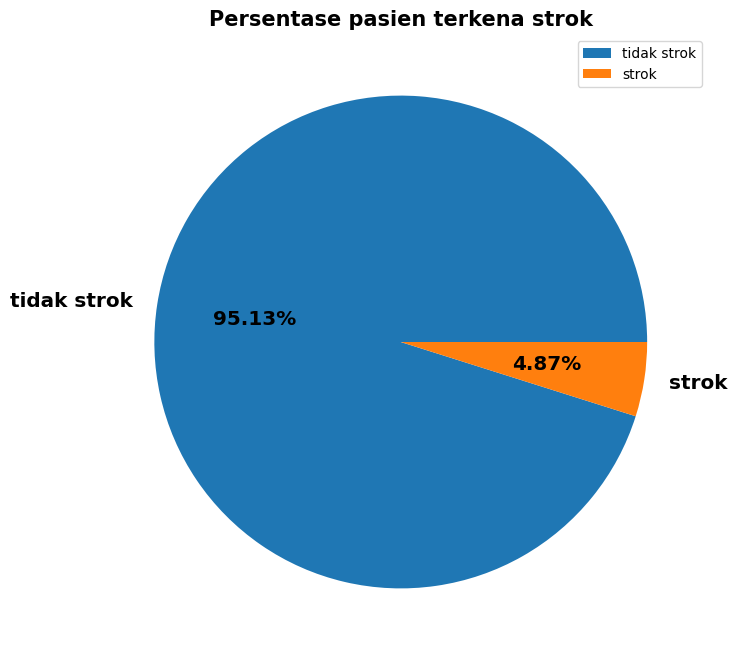

In [ ]:
# Persentase Pasien Diagnosis Stroke/Tidak Stroke
plt.figure(figsize = (10, 8))
plt.pie(pd.value_counts(df['stroke']),
        labels = ['tidak strok','strok'],
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold'})

plt.legend()
plt.title('Persentase pasien terkena strok', fontsize = 15, fontweight = 'bold')
plt.show()

Karena terjadi ketidakseimbangan data, maka dibutuhkan penanganan imbalanced data menggunakan oversampling/undersampling

<ipython-input-12-60b931806596>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'viridis')


<Axes: >

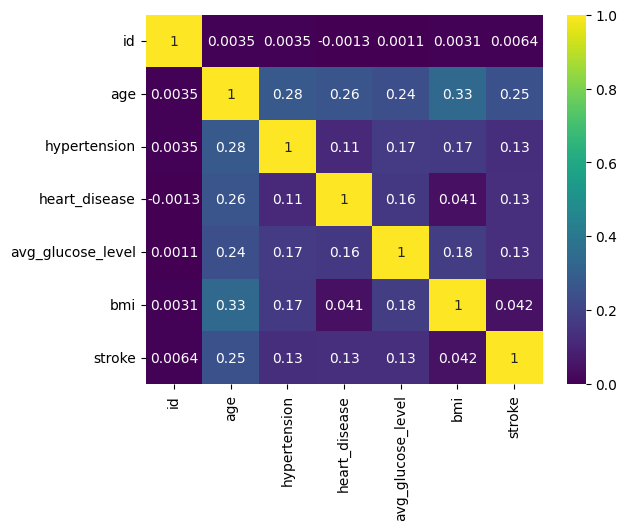

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

## Data Cleaning

In [ ]:
# Mengganti Missing Value pada Atribut 'BMI' menjadi Nilai Rata-rata dari Atribut BMI
x = df['bmi'].mean()
df['bmi'].fillna(x,inplace = True)

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Sudah Tidak ada Missing Value/NaN

## Data Preprocessing

Selanjutnya, akan dilakukan penghapusan atribut id, ever_married, residence_type dan work_type. karena atribut tersebut tidak relevan/tidak dibutuhkan untuk diagnosis penyakit strok

In [ ]:
df.drop(["id","ever_married","work_type","Residence_type"],axis=1, inplace=True)

In [ ]:
df

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,171.23,34.400000,smokes,1
4,Female,79.0,1,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,166.29,25.600000,formerly smoked,0


## Data Transformation

In [ ]:
#transofrmation data
#smoking status
for y in df.index:
  while df.loc[y, "smoking_status"] == 'formerly smoked':
        df.loc[y, "smoking_status"] = 0
  while df.loc[y, "smoking_status"] == 'smokes':
        df.loc[y, "smoking_status"] = 1
  while df.loc[y, "smoking_status"] == 'never smoked':
        df.loc[y, "smoking_status"] = 2
  while df.loc[y, "smoking_status"] == 'Unknown':
        df.loc[y, "smoking_status"] = 3

In [ ]:
#transformation data
#gender
for y in df.index:
  while df.loc[y, "gender"] == 'Male':
        df.loc[y, "gender"] = 0
  while df.loc[y, "gender"] == 'Female':
        df.loc[y, "gender"] = 1
  while df.loc[y, "gender"] == 'Other':
        df.loc[y, "gender"] = 2

In [ ]:
df

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,228.69,36.600000,0,1
1,1,61.0,0,0,202.21,28.893237,2,1
2,0,80.0,0,1,105.92,32.500000,2,1
3,1,49.0,0,0,171.23,34.400000,1,1
4,1,79.0,1,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,83.75,28.893237,2,0
5106,1,81.0,0,0,125.20,40.000000,2,0
5107,1,35.0,0,0,82.99,30.600000,2,0
5108,0,51.0,0,0,166.29,25.600000,0,0


## Classification

Splitting Data

In [ ]:
X=df.drop("stroke",axis=1)
y=df.stroke

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size = 0.2)

In [ ]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=10)
classifier.fit(X_train, Y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[966   0]
 [ 56   0]]


0.9452054794520548

## Evaluasi Model

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       0.00      0.00      0.00        56

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.89      0.95      0.92      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold

def get_metrics(estimator, X, y):
    precision = cross_val_score(estimator, X, y, cv=KFold(n_splits=5), scoring='precision')
    recall = cross_val_score(estimator, X, y, cv=KFold(n_splits=5), scoring='recall')
    accuracy = cross_val_score(estimator, X, y, cv=KFold(n_splits=5), scoring='accuracy')
    return precision, recall, accuracy

precision, recall, accuracy = get_metrics(classifier, X_train, Y_train)

df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'Accuracy': accuracy
})
print(df)

df.to_csv('metrics_scores.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

   Precision  Recall  Accuracy
0        0.0     0.0  0.954768
1        0.0     0.0  0.953545
2        0.0     0.0  0.959658
3        0.0     0.0  0.952264
4        0.0     0.0  0.943696


Karena Akurasi, Presisi, Recall tidak seimbang nilainya maka dibutuhkan penanganan oversampling/undersampling data

## OVERSAMPLING DATA

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
# Summarize class distribution before and after SMOTE
from collections import Counter
print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_res))

Original dataset shape: Counter({0: 4861, 1: 249})
Resampled dataset shape: Counter({1: 4861, 0: 4861})


In [ ]:
X_train_res, X_test_res, Y_train_res, Y_test_res = train_test_split(X_res, y_res, test_size = 0.2)

In [ ]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_res = sc.fit_transform(X_train_res)
X_test_res = sc.fit_transform(X_test_res)

In [ ]:
classfierSMOTE = SVC(kernel='rbf', random_state = 10).fit(X_train_res, Y_train_res)
predict = classfierSMOTE.predict(X_test_res)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
print("Akurasi =",accuracy_score(predict, Y_test_res))
precision, recall, fscore, support = score(Y_test_res, predict, average='weighted')
print("Presisi =", precision)
print("Recall =", recall)
print("F-score =", fscore)

Akurasi = 0.8354755784061697
Presisi = 0.8355360746973809
Recall = 0.8354755784061697
F-score = 0.8353782858976867


In [ ]:
def get_metrics(estimator, X, y):
    precision = cross_val_score(estimator, X, y, cv=KFold(n_splits=5), scoring='precision')
    recall = cross_val_score(estimator, X, y, cv=KFold(n_splits=5), scoring='recall')
    accuracy = cross_val_score(estimator, X, y, cv=KFold(n_splits=5), scoring='accuracy')
    return precision, recall, accuracy

precision, recall, accuracy = get_metrics(classfierSMOTE, X_train_res, Y_train_res)

df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'Accuracy': accuracy
})
print(df)


   Precision    Recall  Accuracy
0   0.817958  0.870419  0.841260
1   0.827970  0.865459  0.843830
2   0.821297  0.854777  0.832797
3   0.806334  0.874505  0.836656
4   0.815136  0.847742  0.828296


Setelah dilakukan oversampling, terlihat bahwa nilai performa akurasi, presisi dan recall seimbang. maka dapat disimpulkan data dapat digeneralisasi dengan baik. sehingga untuk nilai akurasi, presisi dan recall yg diambil adalah nilai setelah oversampling

## Analisis Hasil Klasifikasi

tf.Tensor(
[[766 172]
 [148 859]], shape=(2, 2), dtype=int32)


Text(95.72222222222221, 0.5, 'Prediksi Diagnosis Strok, 0: TIdak Strok/1: Strok')

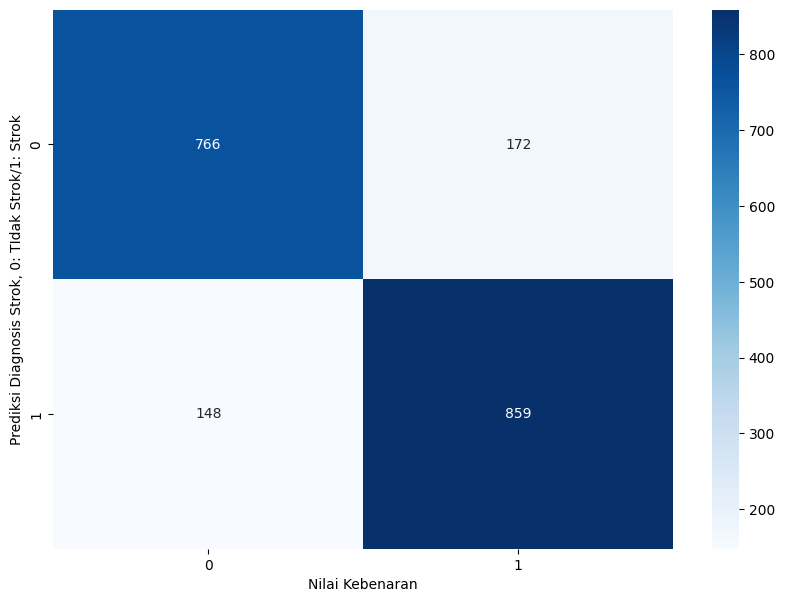

In [ ]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels= Y_test_res,predictions = predict)

print(cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Nilai Kebenaran')
plt.ylabel('Prediksi Diagnosis Strok, 0: TIdak Strok/1: Strok')